In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
fully_vaccinated = pd.read_csv("fully-vaccinated.csv")
daily_cases = pd.read_csv("daily_cases.csv")

In [4]:
israel_vaccinated = fully_vaccinated[fully_vaccinated.Entity == "Israel"]
israel_daily_cases = daily_cases[daily_cases.location == "Israel"]

israel_daily_cases = israel_daily_cases.iloc[319:, :]
israel_vaccinated = israel_vaccinated.iloc[:91, :]

israel_vaccinated = israel_vaccinated.people_fully_vaccinated_per_hundred

israel_daily_cases = israel_daily_cases.reset_index()
israel_vaccinated = israel_vaccinated.reset_index()

del israel_vaccinated["index"]
del israel_daily_cases["index"]

israel_daily_cases["% of fully vaccinated population"] = israel_vaccinated
israel_daily_cases["average for last 7 days"] = israel_daily_cases.new_cases.rolling(window=7).mean()
israel_daily_cases["change in cases"] = israel_daily_cases["average for last 7 days"].rolling(window=2).apply(lambda x: x[1] - x[0])
israel_daily_cases["increase in vaccinated population"] = israel_daily_cases["% of fully vaccinated population"].rolling(window=2).apply(lambda x: x[1] - x[0])
israel_daily_cases["average change"] = israel_daily_cases["change in cases"].rolling(window=7).mean()

/Users/andreibrasoveanu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
/Users/andreibrasoveanu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning


[Text(0, 0.5, 'Average day-to-day change in new cases number (over last 7 days)')]

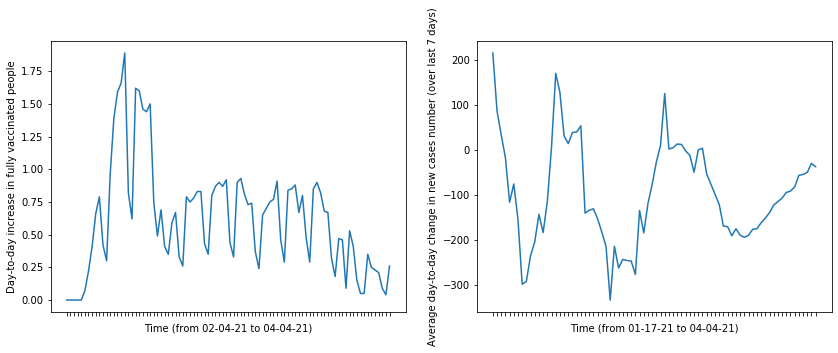

In [13]:
fig, axs = plt.subplots(ncols=2, figsize=(14, 5))
sb1 = sns.lineplot(x="date", y="increase in vaccinated population", data=israel_daily_cases, ax=axs[0])
sb2 = sns.lineplot(x="date", y="average change", data=israel_daily_cases, ax = axs[1])
sb1.set(xlabel="Time (from 01-05-21 to 04-04-21)")
sb1.set(xticklabels=[])
sb1.set(ylabel="Day-to-day increase (%) in fully vaccinated people")
sb2.set(xlabel="Time (from 01-17-21 to 04-04-21)")
sb2.set(xticklabels=[])
sb2.set(ylabel="Average day-to-day change in new cases number (over last 7 days)")

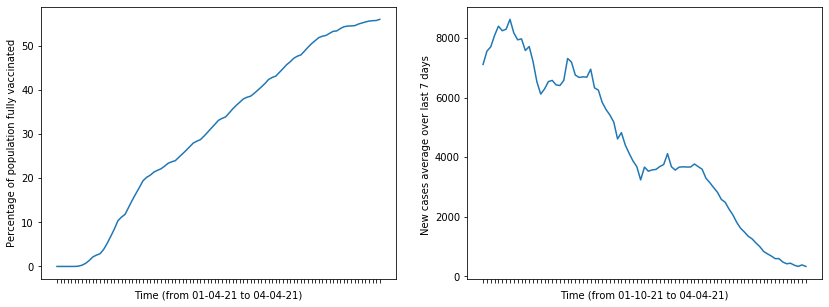

In [37]:
fig, axs = plt.subplots(ncols=2, figsize=(14, 5))
sb1 = sns.lineplot(x="date", y="% of fully vaccinated population", data=israel_daily_cases, ax=axs[0])
sb2 = sns.lineplot(x="date", y="average for last 7 days", data=israel_daily_cases, ax = axs[1])
sb1.set(xlabel="Time (from 01-04-21 to 04-04-21)")
sb1.set(xticklabels=[])
sb1.set(ylabel="Percentage of population fully vaccinated")
sb2.set(xlabel="Time (from 01-10-21 to 04-04-21)")
sb2.set(xticklabels=[])
sb2.set(ylabel="New cases average over last 7 days ")
fig.savefig("Vaccinated vs. New cases.png")

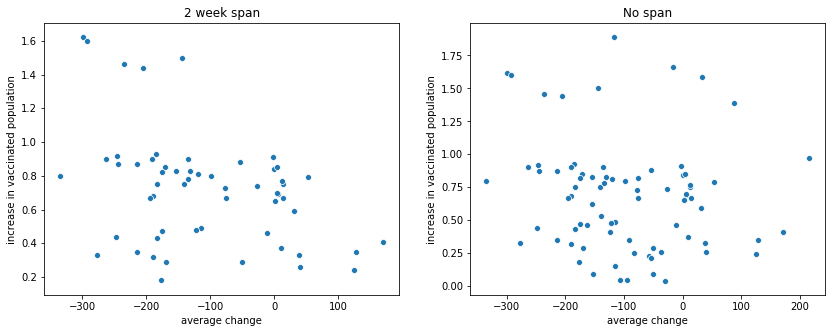

In [40]:
fig, axs = plt.subplots(ncols=2, figsize=(14, 5))
sb1 = sns.scatterplot(israel_daily_cases["average change"][20:], israel_daily_cases["increase in vaccinated population"][6:77], ax=axs[0])
sb2 = sns.scatterplot(israel_daily_cases["average change"], israel_daily_cases["increase in vaccinated population"], ax=axs[1])
sb1.set_title("2 week span")
sb2.set_title("No span")
fig.savefig("Correlations: 2 week span vs. No span.png")

In [29]:
israel_daily_cases["average change"].corr(israel_daily_cases["increase in vaccinated population"])

-0.15561875319361215

In [27]:
israel_daily_cases["average change"][20:].corr(israel_daily_cases["increase in vaccinated population"][6:77])

-0.3954651625021044

In [39]:
israel_daily_cases.to_csv("vaccinated_corrs.csv")